In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import minisom
from sklearn.preprocessing import LabelEncoder
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import umap

2024-05-24 00:18:24.807659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 00:18:25.411350: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 00:18:25.420714: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 00:18:28.090004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
df = pd.read_csv(open('All_Pokemon.csv', 'rb'))
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [16]:
df = df.drop(['Name', 'Number'], axis = 1)
df.head()

,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [17]:
type(df['Abilities'].iloc[0])

str

In [18]:
typr1_encoder = LabelEncoder()
df['Type 1'] = typr1_encoder.fit_transform(df['Type 1'])
df['Type 1'].value_counts()

Type 1
17    131
12    114
9      91
0      81
14     77
6      64
15     59
3      59
1      46
2      42
5      42
10     41
8      41
13     40
11     38
16     36
4      22
7       8
Name: count, dtype: int64

In [19]:
df['Abilities'] = df['Abilities'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df.head()

,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,9,Poison,Chlorophyll Overgrow,45,49,49,65,65,45,318,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,9,Poison,Chlorophyll Overgrow,60,62,63,80,80,60,405,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,9,Poison,Chlorophyll Overgrow,80,82,83,100,100,80,525,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,9,Poison,Thick Fat,80,100,123,122,120,80,625,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,6,NaN,Blaze Solar Power,39,52,43,60,50,65,309,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [20]:
df['Experience type'].value_counts()

Experience type
Medium Fast    426
Slow           254
Medium Slow    245
Fast            67
Erratic         26
Fluctuating     14
Name: count, dtype: int64

In [21]:
exp_encoder = LabelEncoder()
df['Experience type'] = exp_encoder.fit_transform(df['Experience type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type 1                   1032 non-null   int64  
 1   Type 2                   548 non-null    object 
 2   Abilities                1032 non-null   object 
 3   HP                       1032 non-null   int64  
 4   Att                      1032 non-null   int64  
 5   Def                      1032 non-null   int64  
 6   Spa                      1032 non-null   int64  
 7   Spd                      1032 non-null   int64  
 8   Spe                      1032 non-null   int64  
 9   BST                      1032 non-null   int64  
 10  Mean                     1032 non-null   float64
 11  Standard Deviation       1032 non-null   float64
 12  Generation               1032 non-null   float64
 13  Experience type          1032 non-null   int64  
 14  Experience to level 100 

In [22]:
tfidf_vectorizer_subject = TfidfVectorizer(max_features = 1000)
tfidf_matrix_subject = tfidf_vectorizer_subject.fit_transform(df['Abilities'].values.astype('U'))
tfidf_df_subject = pd.DataFrame(data = tfidf_matrix_subject.toarray(), columns = tfidf_vectorizer_subject.get_feature_names_out())

df = pd.concat([df, tfidf_df_subject], axis = 1)
df = df.drop('Abilities', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Columns: 389 entries, Type 1 to zen
dtypes: float64(377), int64(11), object(1)
memory usage: 3.1+ MB


In [23]:
df

,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,Mean,...,volt,wandering,warning,water,weak,white,wimp,wings,wonder,zen
0,9,Poison,45,49,49,65,65,45,318,53.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,Poison,60,62,63,80,80,60,405,67.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,Poison,80,82,83,100,100,80,525,87.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Poison,80,100,123,122,120,80,625,104.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,NaN,39,52,43,60,50,65,309,51.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,11,NaN,100,145,130,65,110,30,580,96.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1028,8,NaN,100,65,60,145,80,130,580,96.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,14,Grass,100,80,80,80,80,80,500,83.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030,14,Ice,100,165,150,85,130,50,680,113.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_missing = df[df['Type 2'].isna()]
df_missing

,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,Mean,...,volt,wandering,warning,water,weak,white,wimp,wings,wonder,zen
4,6,NaN,39,52,43,60,50,65,309,51.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,NaN,58,64,58,80,65,80,405,67.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,17,NaN,44,48,65,50,64,43,314,52.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,17,NaN,59,63,80,65,80,58,405,67.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,17,NaN,79,83,100,85,105,78,530,88.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,5,NaN,60,90,60,53,50,72,385,64.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1025,3,NaN,80,100,50,100,50,200,580,96.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1026,2,NaN,200,100,50,100,50,80,580,96.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1027,11,NaN,100,145,130,65,110,30,580,96.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_fullfill = df[df['Type 2'].notna()]
df_fullfill

,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,Mean,...,volt,wandering,warning,water,weak,white,wimp,wings,wonder,zen
0,9,Poison,45,49,49,65,65,45,318,53.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,Poison,60,62,63,80,80,60,405,67.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,Poison,80,82,83,100,100,80,525,87.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Poison,80,100,123,122,120,80,625,104.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Flying,78,84,78,109,85,100,534,89.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,5,Dark,100,130,100,63,60,97,550,91.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1024,1,Grass,105,120,105,70,95,105,600,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,14,Grass,100,80,80,80,80,80,500,83.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030,14,Ice,100,165,150,85,130,50,680,113.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
type2_encoder = LabelEncoder()
df_fullfill['Type 2'] = type2_encoder.fit_transform(df_fullfill['Type 2'])
df_fullfill['Type 2'].value_counts()

/tmp/ipykernel_6681/1878665844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fullfill['Type 2'] = type2_encoder.fit_transform(df_fullfill['Type 2'])


Type 2
7     112
14     42
4      41
10     39
13     37
16     35
5      31
2      30
9      28
8      27
1      26
17     20
11     18
6      17
15     15
3      11
12     10
0       9
Name: count, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_fullfill.drop('Type 2', axis = 1), 
                                                    df_fullfill['Type 2'], test_size = 0.2)

In [28]:
model = RandomForestClassifier(n_estimators = 1024, max_depth = 7, max_features = X_train.shape[1] // 2)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=194, n_estimators=1024)

In [29]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print("\nClassification Report:")
print(class_report)
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Cohen's Kappa Score: {kappa}")


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      1.00      0.83         5
           2       1.00      0.75      0.86         4
           3       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         9
           5       1.00      0.75      0.86         4
           6       0.50      0.67      0.57         3
           7       0.92      1.00      0.96        23
           8       1.00      0.83      0.91         6
           9       0.88      1.00      0.93         7
          10       0.80      1.00      0.89         8
          11       0.57      1.00      0.73         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         7
          14       1.00      0.86      0.92         7
          15       1.00      0.75      0.86         4
          16       1.00      0.86      0.92         7
   

/home/masikol/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/masikol/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/masikol/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

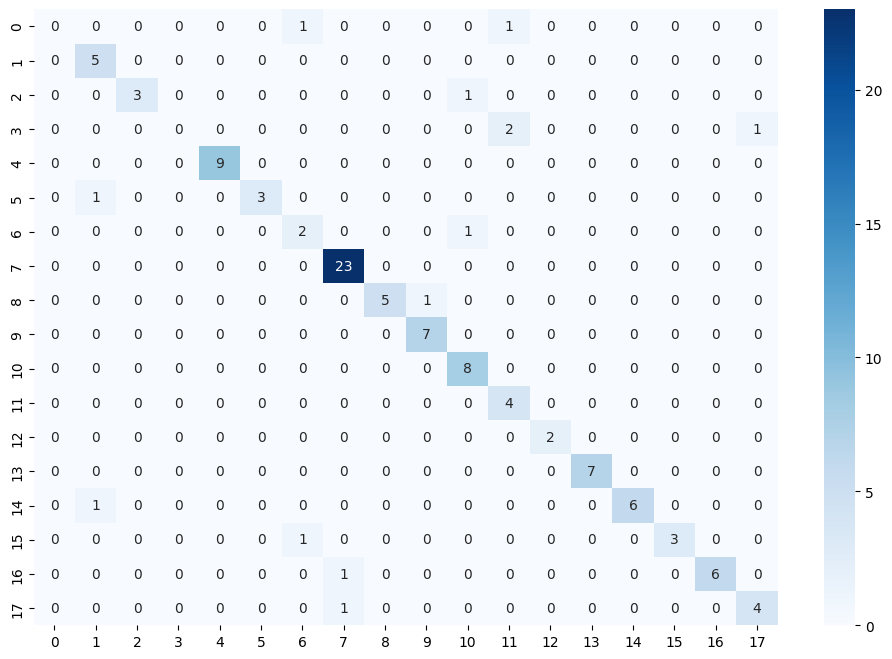

In [30]:
plt.figure(figsize = (12, 8))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')

In [31]:
df_fullfill['Type 2'].value_counts()

Type 2
7     112
14     42
4      41
10     39
13     37
16     35
5      31
2      30
9      28
8      27
1      26
17     20
11     18
6      17
15     15
3      11
12     10
0       9
Name: count, dtype: int64

In [32]:
predictions = model.predict(df_missing.drop('Type 2', axis = 1))
df_missing['Type 2'] = predictions
df_missing.head()

/tmp/ipykernel_6681/1141783066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['Type 2'] = predictions


,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,Mean,...,volt,wandering,warning,water,weak,white,wimp,wings,wonder,zen
4,6,6,39,52,43,60,50,65,309,51.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,6,58,64,58,80,65,80,405,67.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,17,17,44,48,65,50,64,43,314,52.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,17,17,59,63,80,65,80,58,405,67.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,17,17,79,83,100,85,105,78,530,88.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df = pd.concat([df_fullfill, df_missing])
df['Type 2'].value_counts()

Type 2
17    124
7     116
2     100
14     96
9      92
5      60
4      60
10     56
13     53
6      50
16     46
8      42
1      40
11     38
12     24
15     15
3      11
0       9
Name: count, dtype: int64

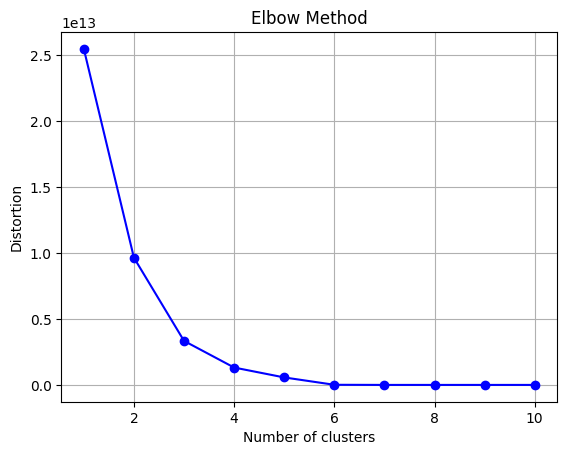

In [34]:
distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1212)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 11), distortions, marker = 'o', c = 'b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [44]:
som = minisom.MiniSom(6, 1, df.shape[1], sigma = 0.3, learning_rate = 0.5)
som.random_weights_init(df.values)
som.train_random(df.values, 1000)
feature_map = som.win_map(df.values)

In [45]:
labels = np.zeros(len(df.values))
for i, x in enumerate(df.values):
    winning_node = som.winner(x)
    labels[i] = winning_node[0]

silhouette_avg = silhouette_score(df.values, labels)

db_index = davies_bouldin_score(df.values, labels)

ch_index = calinski_harabasz_score(df.values, labels)
silhouette_avg, db_index, ch_index


(0.9612043509471504, 0.13142680282390978, 2965.228201875701)

/home/masikol/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


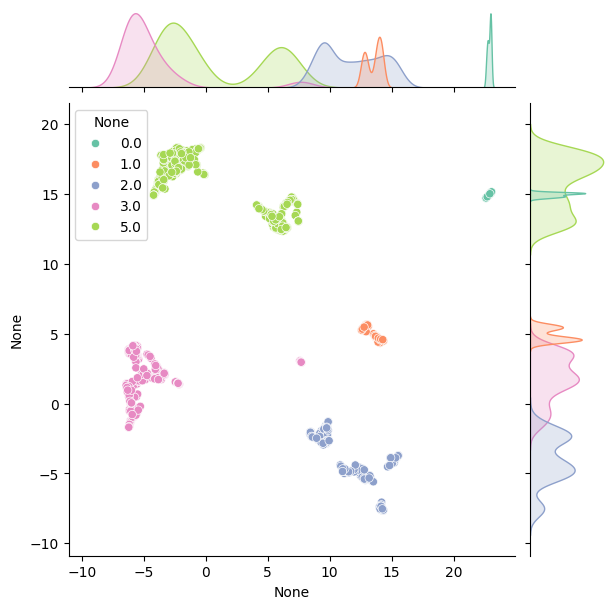

In [58]:
pca = umap.UMAP(n_components = 2)
df_umap = pca.fit_transform(df)

sns.jointplot(x = df_umap[:, 0], y = df_umap[:, 1], kind = "scatter", hue =  labels, palette = "Set2", height = 6)

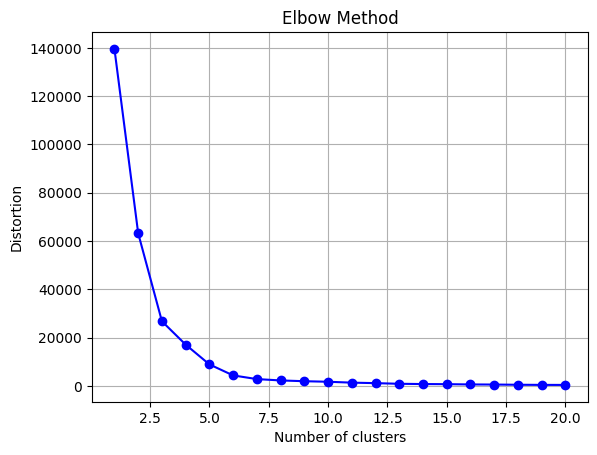

In [59]:
distortions = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, random_state = 1212)
    kmeans.fit(df_umap)
    distortions.append(kmeans.inertia_)


plt.plot(range(1, 21), distortions, marker = 'o', c = 'b')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [103]:
som = minisom.MiniSom(8, 1, df_umap.shape[1], sigma = 0.3, learning_rate = 0.5)
som.random_weights_init(df_umap)
som.train_random(df_umap, 1000)
feature_map = som.win_map(df_umap)

labels = np.zeros(len(df_umap))
for i, x in enumerate(df_umap):
    winning_node = som.winner(x)
    labels[i] = winning_node[0]

silhouette_avg = silhouette_score(df_umap, labels)

db_index = davies_bouldin_score(df_umap, labels)

ch_index = calinski_harabasz_score(df_umap, labels)
silhouette_avg, db_index, ch_index


(0.7029485, 0.4385429006382292, 9046.745493576045)

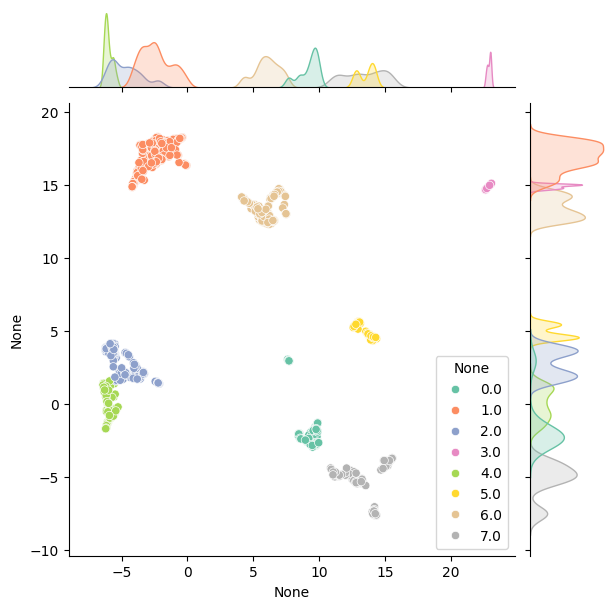

In [104]:
sns.jointplot(x = df_umap[:, 0], y = df_umap[:, 1], kind = "scatter", hue =  labels, palette = "Set2", height = 6)

In [105]:
som = minisom.MiniSom(10, 1, df_umap.shape[1], sigma = 0.3, learning_rate = 0.5)
som.random_weights_init(df_umap)
som.train_random(df_umap, 1000)
feature_map = som.win_map(df_umap)

labels = np.zeros(len(df_umap))
for i, x in enumerate(df_umap):
    winning_node = som.winner(x)
    labels[i] = winning_node[0]

silhouette_avg = silhouette_score(df_umap, labels)

db_index = davies_bouldin_score(df_umap, labels)

ch_index = calinski_harabasz_score(df_umap, labels)
silhouette_avg, db_index, ch_index


(0.7134077, 0.5006846888415092, 6602.924665644115)

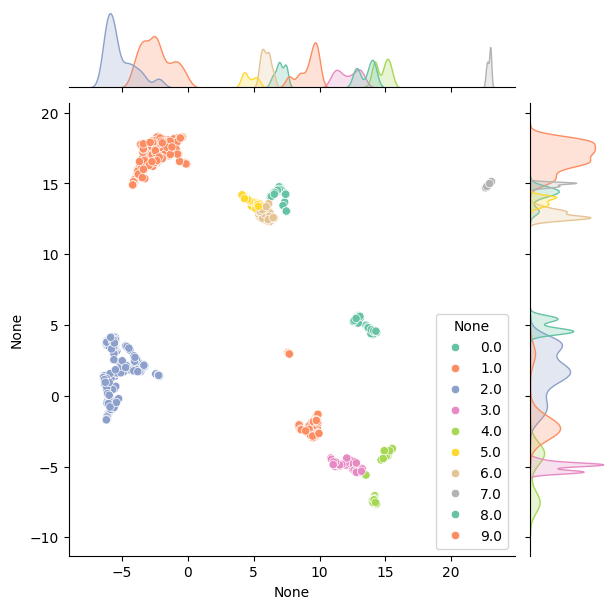

In [106]:
sns.jointplot(x = df_umap[:, 0], y = df_umap[:, 1], kind = "scatter", hue =  labels, palette = "Set2", height = 6)